## IMPORT LIBRARIES

In [74]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("E:\ExcelR Assignment\Assignment 18 - Forecasting\Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

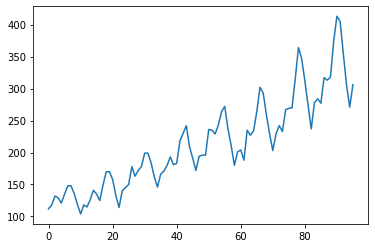

In [3]:
df.Passengers.plot()

### So this Plot has Upward Linear Rising Trend alongwith Multiplicative Seasonality

In [4]:
df.shape

(96, 2)

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
df["month"] = df.Month.dt.strftime("%b") # month extraction
df["year"] = df.Month.dt.strftime("%Y") # year extraction
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [8]:
heatmap_year_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_year_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

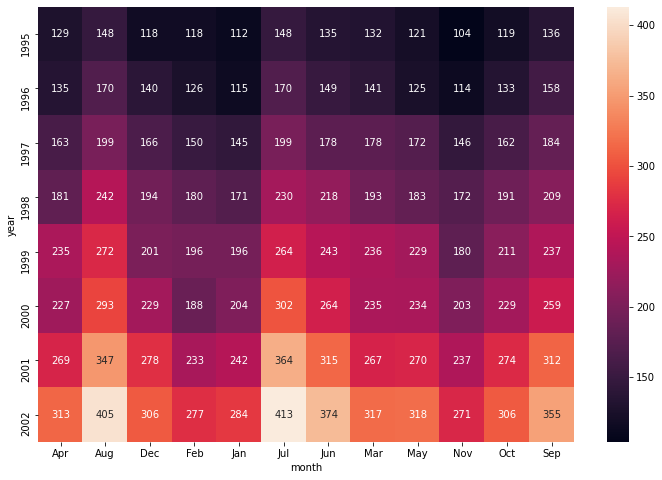

In [9]:
plt.figure(figsize=(12,8))
heatmap_year_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

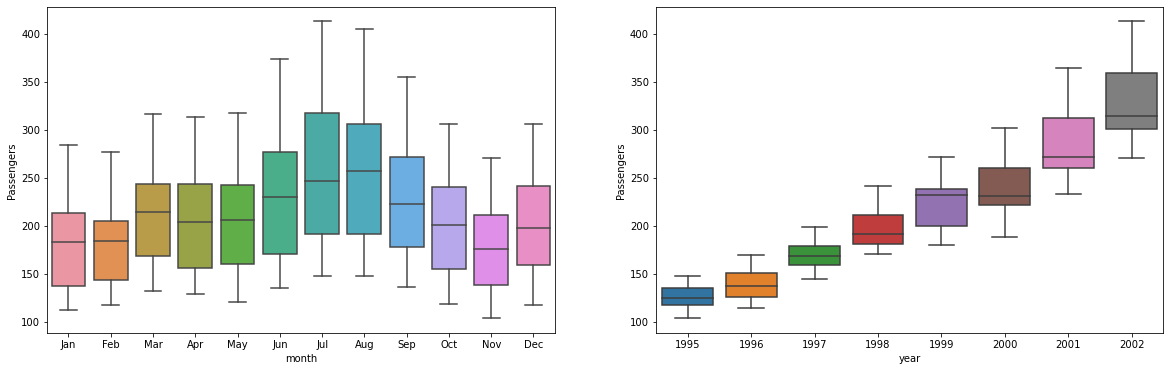

In [10]:
# Boxplot for ever
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x="month",y="Passengers",data=df,ax=axes[0])
sns.boxplot(x="year",y="Passengers",data=df,ax=axes[1])

- Monthly plot shows the Fluctuation of Median
-Year plot has increased Passenger count

<AxesSubplot:xlabel='year', ylabel='Passengers'>

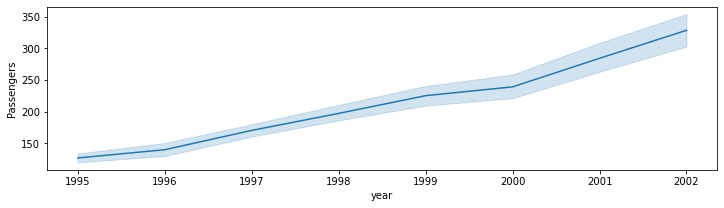

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

## Creating Dummies for Month

In [12]:
df.head(2)

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995


In [13]:
import datetime
df['m'] = range(1,(df.shape[0]+1))
df['m_square'] = np.power(df['m'],2)
df['log_Passengers']=np.log(df['Passengers'])
df.head()

,Month,Passengers,month,year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [14]:
ddf = pd.get_dummies(df.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
fdf = pd.concat([df,ddf],axis=1)
fdf.head(2)

,Month,Passengers,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0


### Rearranging the Data

In [16]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(fdf,columns=col)
df1.tail()

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91,2002-08-01,405,Aug,92,8464,2002,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,93,8649,2002,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,94,8836,2002,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,95,9025,2002,5.602119,0,0,0,0,0,0,0,0,0,0,1,0
95,2002-12-01,306,Dec,96,9216,2002,5.723585,0,0,0,0,0,0,0,0,0,0,0,1


## Splitting Data

In [17]:
df1.shape

(96, 19)

In [18]:
Train = df1.head(86)
Test = df1.tail(10)

## Linear Model

In [19]:
linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.64314972778256

## Exponential

In [20]:
Exp = smf.ols('log_Passengers~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.90312334789315

## Quadratic

In [21]:
Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.914363578529574

## Additive seasonality 

In [22]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.7901043681932

## Additive Seasonality Quadratic 

In [23]:
add_sea_Quad = smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m','m_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899229657

## Multiplicative Seasonality

In [24]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.38493549461415

## Multiplicative Additive Seasonality 

In [25]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.264958330333998

## Compare the results 

In [26]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935


## Predicting for New Time Period (Month-wise Forecast)

In [27]:
predict_data = pd.read_excel("E:\ExcelR Assignment\Assignment 18 - Forecasting\Predict+Airlines.xlsx")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m,m_square
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236


## Build Model with least RMSE

In [28]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_new = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     5.768161
1     5.778685
2     5.925981
3     5.890249
4     5.880530
5     5.998892
6     6.106155
7     6.106531
8     5.999368
9     5.871888
10    5.740154
11    5.878855
dtype: float64

In [71]:
predict_data["forecasted_Passengers"] = pd.Series(np.exp(pred_new))
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m,m_square,forecasted_Passengers
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409,314.246640
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604,314.362265
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801,314.477931
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000,314.593640
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201,314.709392
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404,314.825187
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609,314.941024
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816,315.056903
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025,315.172825
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236,315.288790


<AxesSubplot:xlabel='Month', ylabel='forecasted_Passengers'>

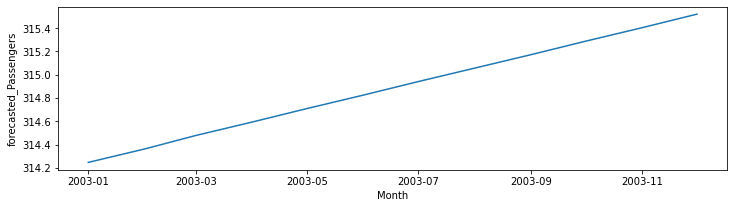

In [72]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="forecasted_Passengers",data=predict_data)

## The above data is Monthly Forecasted values for the Next Year

# Using Upsampling

In [30]:
df = pd.read_excel("E:\ExcelR Assignment\Assignment 18 - Forecasting\Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [31]:
series = pd.read_excel('E:\ExcelR Assignment\Assignment 18 - Forecasting\Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True,squeeze=True)
series.head()

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: Passengers, dtype: int64

In [32]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64


Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64


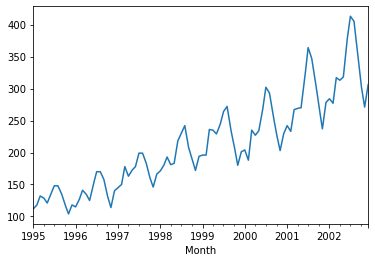

In [33]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

In [34]:
#Saving the file to my local drive
interpolated.to_csv("E:\ExcelR Assignment\Assignment 18 - Forecasting\interpolated.csv")

In [35]:
df2= pd.read_csv("E:\ExcelR Assignment\Assignment 18 - Forecasting\interpolated.csv")
df2.head()

,Month,Passengers
0,1995-01-01,112.000000
1,1995-01-02,112.193548
2,1995-01-03,112.387097
3,1995-01-04,112.580645
4,1995-01-05,112.774194


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       2892 non-null   object 
 1   Passengers  2892 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.3+ KB


### Converting Month column from Object type to DateTime

In [37]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['Month']

0      1995-01-01
1      1995-01-02
2      1995-01-03
3      1995-01-04
4      1995-01-05
          ...    
2887   2002-11-27
2888   2002-11-28
2889   2002-11-29
2890   2002-11-30
2891   2002-12-01
Name: Month, Length: 2892, dtype: datetime64[ns]

In [38]:
df2["month"] = df2.Month.dt.strftime("%b")
df2['year']=df2['Month'].dt.year
df2.head()

,Month,Passengers,month,year
0,1995-01-01,112.000000,Jan,1995
1,1995-01-02,112.193548,Jan,1995
2,1995-01-03,112.387097,Jan,1995
3,1995-01-04,112.580645,Jan,1995
4,1995-01-05,112.774194,Jan,1995


In [39]:
df2['m1'] = range(1,(df2.shape[0]+1))
df2['m1_square'] = np.power(df2['m1'],2)
df2['log_Passengers']=np.log(df2['Passengers'])
df2.head(2)

,Month,Passengers,month,year,m1,m1_square,log_Passengers
0,1995-01-01,112.000000,Jan,1995,1,1,4.718499
1,1995-01-02,112.193548,Jan,1995,2,4,4.720225


In [40]:
ddf1 = pd.get_dummies(df2.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf1.head(2)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
df3 = pd.concat([df2,ddf1],axis=1)
df3.head(2)

,Month,Passengers,month,year,m1,m1_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112.000000,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-01-02,112.193548,Jan,1995,2,4,4.720225,0,0,0,0,1,0,0,0,0,0,0,0


### Rearranging the Data

In [53]:
col = ['Month', 'Passengers', 'month', 'm1', 'm1_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df3 = pd.DataFrame(df3,columns=col)
df3.tail()

,Month,Passengers,month,m1,m1_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2887,2002-11-27,301.333333,Nov,2888,8340544,2002,5.708217,0,0,0,0,0,0,0,0,0,0,1,0
2888,2002-11-28,302.500000,Nov,2889,8346321,2002,5.712081,0,0,0,0,0,0,0,0,0,0,1,0
2889,2002-11-29,303.666667,Nov,2890,8352100,2002,5.715931,0,0,0,0,0,0,0,0,0,0,1,0
2890,2002-11-30,304.833333,Nov,2891,8357881,2002,5.719765,0,0,0,0,0,0,0,0,0,0,1,0
2891,2002-12-01,306.000000,Dec,2892,8363664,2002,5.723585,0,0,0,0,0,0,0,0,0,0,0,1


## Splitting Data

In [43]:
df3.shape

(2892, 19)

In [44]:
Train1 = df3.head(2592)
Test1 = df3.tail(300)

## Linear Model

In [45]:
linear_model1 = smf.ols('Passengers~m1',data=Train1).fit()
pred_linear1 =  pd.Series(linear_model1.predict(pd.DataFrame(Test1['m1'])))
rmse_linear1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_linear1))**2))
rmse_linear1

57.096089720172884

## Exponential Model

In [46]:
Exp1 = smf.ols('log_Passengers~m1',data=Train1).fit()
pred_Exp1 = pd.Series(Exp1.predict(pd.DataFrame(Test1['m1'])))
rmse_Exp1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_Exp1)))**2))
rmse_Exp1

47.609371399406065

## Quadratic Model

In [47]:
Quad1 = smf.ols('Passengers~m1+m1_square',data=Train1).fit()
pred_Quad1 = pd.Series(Quad1.predict(Test1[["m1","m1_square"]]))
rmse_Quad1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_Quad1))**2))
rmse_Quad1

51.79089614651464

## Additive Seasonality

In [48]:
add_sea1 = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train1).fit()
pred_add_sea1 = pd.Series(add_sea1.predict(Test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_add_sea1))**2))
rmse_add_sea1

137.03446126321333

## Additive Seasonality Quadratic

In [49]:
add_sea_Quad1 = smf.ols('Passengers~m1+m1_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train1).fit()
pred_add_sea_quad1 = pd.Series(add_sea_Quad1.predict(Test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m1','m1_square']]))
rmse_add_sea_quad1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_add_sea_quad1))**2))
rmse_add_sea_quad1

30.1198120706885

## Multiplicative Seasonality

In [50]:
Mul_sea1 = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train1).fit()
pred_Mult_sea1 = pd.Series(Mul_sea1.predict(Test1))
rmse_Mult_sea1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_Mult_sea1)))**2))
rmse_Mult_sea1

144.624929103071

## Multplicative Additive Seasonality

In [51]:
Mul_Add_sea1 = smf.ols('log_Passengers~m1+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train1).fit()
pred_Mult_add_sea1 = pd.Series(Mul_Add_sea1.predict(Test1))
rmse_Mult_add_sea1 = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_Mult_add_sea1)))**2))
rmse_Mult_add_sea1 

14.718727021210038

# Comparing the results

In [52]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear1,rmse_Exp1,rmse_Quad1,rmse_add_sea1,rmse_add_sea_quad1,rmse_Mult_sea1,rmse_Mult_add_sea1])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,14.718727
4,rmse_add_sea_quad,30.119812
1,rmse_Exp,47.609371
2,rmse_Quad,51.790896
0,rmse_linear,57.096090
3,rmse_add_sea,137.034461
5,rmse_Mult_sea,144.624929


## Predicting for New Time Period (Date-wise Forecast)

In [57]:
predict_data1 = pd.read_excel("E:\ExcelR Assignment\Assignment 18 - Forecasting\Predict+Airlines+date.xlsx")
predict_data1.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m1,m1_square
0,2002-12-02,0,0,0,0,0,0,0,0,0,0,0,1,2893,8369449
1,2002-12-03,0,0,0,0,0,0,0,0,0,0,0,1,2894,8375236
2,2002-12-04,0,0,0,0,0,0,0,0,0,0,0,1,2895,8381025
3,2002-12-05,0,0,0,0,0,0,0,0,0,0,0,1,2896,8386816
4,2002-12-06,0,0,0,0,0,0,0,0,0,0,0,1,2897,8392609


In [58]:
Train1.head()

,Month,Passengers,month,m1,m1_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112.000000,Jan,1,1,1995,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-01-02,112.193548,Jan,2,4,1995,4.720225,1,0,0,0,0,0,0,0,0,0,0,0
2,1995-01-03,112.387097,Jan,3,9,1995,4.721949,1,0,0,0,0,0,0,0,0,0,0,0
3,1995-01-04,112.580645,Jan,4,16,1995,4.723670,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-01-05,112.774194,Jan,5,25,1995,4.725388,1,0,0,0,0,0,0,0,0,0,0,0


## Build Model with least RMSE

In [61]:
Mul_Add_sea = smf.ols('log_Passengers~m1+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train1).fit()
pred_new1 = pd.Series(Mul_Add_sea.predict(predict_data1))
pred_new1

0      5.750178
1      5.750546
2      5.750914
3      5.751282
4      5.751650
         ...   
390    5.893649
391    5.894016
392    5.894384
393    5.894752
394    5.895120
Length: 395, dtype: float64

In [62]:
predict_data1["forecasted_Passengers"] = pd.Series(np.exp(pred_new)).astype(int)
predict_data1

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m1,m1_square,forecasted_Passengers
0,2002-12-02,0,0,0,0,0,0,0,0,0,0,0,1,2893,8369449,314
1,2002-12-03,0,0,0,0,0,0,0,0,0,0,0,1,2894,8375236,314
2,2002-12-04,0,0,0,0,0,0,0,0,0,0,0,1,2895,8381025,314
3,2002-12-05,0,0,0,0,0,0,0,0,0,0,0,1,2896,8386816,314
4,2002-12-06,0,0,0,0,0,0,0,0,0,0,0,1,2897,8392609,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2003-12-27,0,0,0,0,0,0,0,0,0,0,0,1,3283,10778089,362
391,2003-12-28,0,0,0,0,0,0,0,0,0,0,0,1,3284,10784656,362
392,2003-12-29,0,0,0,0,0,0,0,0,0,0,0,1,3285,10791225,362
393,2003-12-30,0,0,0,0,0,0,0,0,0,0,0,1,3286,10797796,363


In [77]:
predict_data1.iloc[363,:]

Month                    2003-11-30 00:00:00
Jan                                        0
Feb                                        0
Mar                                        0
Apr                                        0
May                                        0
Jun                                        0
Jul                                        0
Aug                                        0
Sep                                        0
Oct                                        0
Nov                                        1
Dec                                        0
m1                                      3256
m1_square                           10601536
forecasted_Passengers                    335
Name: 363, dtype: object

<AxesSubplot:xlabel='Month', ylabel='forecasted_Passengers'>

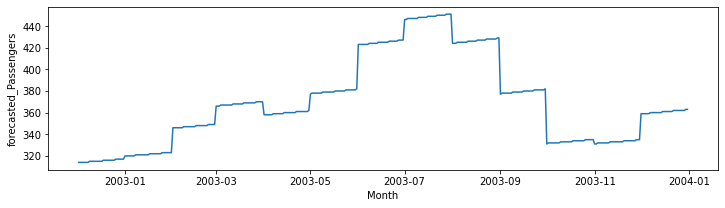

In [73]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="forecasted_Passengers",data=predict_data1)

## The above data is Daily Forecasted values for the Next Consecutive Year